# Polarisation des commentaires

## Récupération de la base de données et ajout de colonnes de polarités

In [1]:
#!pip install textblob
#!pip install textblob-fr

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from textblob_fr import PatternTagger, PatternAnalyzer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yseul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
#import du dataframe avec la colonne clean

#choisir le bon path
path = "C:/Users/yseul/Documents/ENSAE/2A/Info/projet-python-2a/comments.csv"
data = pd.read_csv(path)

In [52]:
data.head()

,videoId,textDisplay,textOriginal,authorDisplayName,authorProfileImageUrl,authorChannelUrl,authorChannelId,canRate,viewerRating,publishedAt,...,commentLikeCount,viewCount,commentCount,videoLikeCount,videoTitle,videoDate,textClean,Polarity,sentencesPolarity,DBY
0,8Y-ObRQk5TA,Qui d&#39;autre veut la vidéo de 10h en mode t...,Qui d'autre veut la vidéo de 10h en mode top 5...,Victorin Demange,https://yt3.ggpht.com/ytc/AKedOLRM36O43sCehBU5...,http://www.youtube.com/channel/UCqj3nApyBpfWW0...,UCqj3nApyBpfWW0zuVTxfRXw,True,none,2021-12-12T13:16:45Z,...,1060,378580,767,35255,Pourquoi l&#39;évolution se répète en boucle -...,2021-12-12T13:00:37Z,qui d'autre veut la vidéo de 10h en mode top 5...,-0.071,-0.071000,DBY #86
1,8Y-ObRQk5TA,Un ASMR de 10h sur des exemples d&#39;évolutio...,Un ASMR de 10h sur des exemples d'évolutions c...,Terry Anouilh,https://yt3.ggpht.com/ytc/AKedOLTWe1mt7NByzkUT...,http://www.youtube.com/channel/UCn5G6QaD5w_TCO...,UCn5G6QaD5w_TCODclVbKENQ,True,none,2021-12-12T14:21:48Z,...,409,378580,767,35255,Pourquoi l&#39;évolution se répète en boucle -...,2021-12-12T13:00:37Z,un asmr de 10h sur des exemples d'évolutions c...,1.000,0.333333,DBY #86
2,8Y-ObRQk5TA,toujours un plaisir ces vidéos,toujours un plaisir ces vidéos,Dark,https://yt3.ggpht.com/Cv3SNTMi0KHR4x3goJUK7VlR...,http://www.youtube.com/channel/UC6hZ64RB21tnY-...,UC6hZ64RB21tnY-M7jfguuzg,True,none,2021-12-13T07:11:21Z,...,110,378580,767,35255,Pourquoi l&#39;évolution se répète en boucle -...,2021-12-12T13:00:37Z,toujours un plaisir ces vidéos,0.150,0.150000,DBY #86
3,8Y-ObRQk5TA,Nickel j&#39;avais exactement 15 min à perdre ...,Nickel j'avais exactement 15 min à perdre à 14...,Salade Furtive,https://yt3.ggpht.com/ytc/AKedOLSEBH5bF4sYCTD0...,http://www.youtube.com/channel/UCsBjmNhPIpw9y4...,UCsBjmNhPIpw9y4menljVAXw,True,none,2021-12-12T13:03:48Z,...,464,378580,767,35255,Pourquoi l&#39;évolution se répète en boucle -...,2021-12-12T13:00:37Z,nickel j'avais exactement 15 min à perdre à 14...,0.875,0.875000,DBY #86
4,8Y-ObRQk5TA,Je suis en première année de licence de bio et...,Je suis en première année de licence de bio et...,Amélie 18290,https://yt3.ggpht.com/ytc/AKedOLTVVya6P2ld2fj2...,http://www.youtube.com/channel/UCUeYZGxv_AgSYJ...,UCUeYZGxv_AgSYJltQiThiXA,True,none,2021-12-12T23:06:39Z,...,83,378580,767,35255,Pourquoi l&#39;évolution se répète en boucle -...,2021-12-12T13:00:37Z,je suis en première année de licence de bio et...,0.400,0.400000,DBY #86


In [4]:
def blober(text):
    '''renvoie un score entre -1 et 1.
    Plus le score est proche de 1, plus le commentaire est positif.
    Plus il est proche de -1, plus le commentaire est négatif.'''
    return TextBlob(text, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer()).sentiment[0]

blober = np.vectorize(blober)

def sentences(comment):
    '''renvoie une liste des phrases d'un commentaire'''
    tokenizer = nltk.data.load('tokenizers/punkt/french.pickle')
    return tokenizer.tokenize(comment)

def polarisation(comment):
    '''renvoie la moyenne des polarisations des phrases d'un commentaire'''
    s = sentences(comment)
    return np.mean(blober(s))

polarisation = np.vectorize(polarisation)

Création de 2 nouvelles colonnes:

    - Polarity : polarité de chaque commentaire, calculée sur le commentaire entier directement
    
    - sentencesPolarity : polarité de chaque commentaire, calculée en prenant la moyenne des polarités sur chaque phrase que comporte le commentaire.

In [5]:
data["Polarity"] = data.loc[:,['textClean']].apply(blober)
data["sentencesPolarity"] = data.loc[:,['textClean']].apply(polarisation)

Création d'une colonne de numéros des vidéos

In [40]:
data['DBY'] = data.loc[:,['videoTitle']].apply(np.vectorize(lambda string : string[-7:]))

## Analyse des polarités

In [41]:
datapol = data.groupby(['DBY']).mean().sort_values('Polarity', ascending = False)

In [42]:
datapol

,canRate,commentLikeCount,viewCount,commentCount,videoLikeCount,Polarity,sentencesPolarity
DBY,,,,,,,
DBY #81,1.0,38.47,429921.0,1122.0,39998.0,0.388586,0.316646
DBY #72,1.0,157.58,1020227.0,3302.0,87868.0,0.388143,0.366431
DBY #74,1.0,90.47,598415.0,2161.0,50077.0,0.371328,0.315428
DBY#84,1.0,55.28,580045.0,1265.0,49319.0,0.346526,0.290913
DBY #80,1.0,35.65,450412.0,1148.0,42331.0,0.344769,0.317818
DBY #76,1.0,97.29,562054.0,1893.0,47048.0,0.344403,0.299452
DBY #75,1.0,123.79,784094.0,2598.0,76945.0,0.339257,0.321685
DBY #82,1.0,62.37,469834.0,1303.0,45975.0,0.324370,0.287537
DBY #69,1.0,167.34,812544.0,3970.0,75458.0,0.320576,0.290094


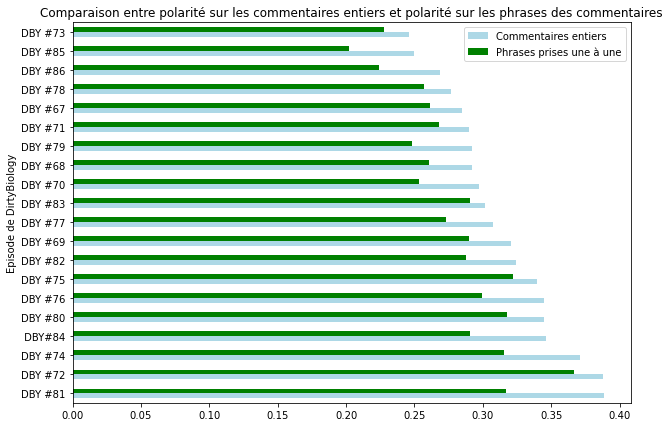

In [80]:
datapol.loc[:,['Polarity','sentencesPolarity']].plot(kind = 'barh', figsize = (10, 7), color = ['lightblue', 'green'], title = 'Comparaison entre polarité sur les commentaires entiers et polarité sur les phrases des commentaires', xlabel = 'Episode de DirtyBiology')
plt.legend(labels = ['Commentaires entiers', 'Phrases prises une à une'])
plt.show()

L'ordre des vidéos change un peu selon la définition que l'on utilise pour la polarité, mais les deux définitions semblent tout de même corrélées (globalement, la polarité prise sur chaque phrase augmente avec celle prise sur le commentaire entier).

Dans la suite, on garde la polarité sur le commentaire entier.

La polarité est un témoin du succès qu'a eu une vidéo. On cherche à présent à la comparer à un autre marqueur de ce succès, à savoir le ratio de "likes" qu'à reçu une vidéo par rapport à son nombre de vues.

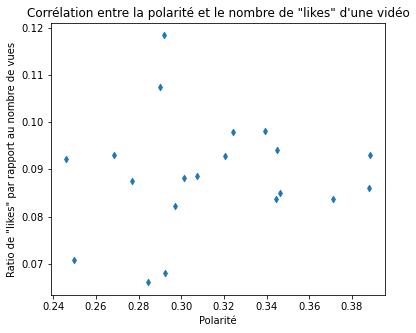

In [81]:
datapol['likeRatio'] = datapol.loc[:,'videoLikeCount'].divide(datapol.loc[:,'viewCount'])
datapol.plot(kind = 'scatter', x = 'Polarity', y = 'likeRatio',figsize = (6, 5), marker = 'd', xlabel = 'Polarité', ylabel = 'Ratio de \"likes\" par rapport au nombre de vues', title = 'Corrélation entre la polarité et le nombre de \"likes\" d\'une vidéo')
plt.show()

Il semble ne pas y avoir de corrélation entre ces deux marqueurs. Cela peut être dû au fait que la polarisation ne soit pas très précise, ou que les personnes qui commentent les vidéos n'aient pas le même profil que ceux qui se contentent de "liker".